# <u>Homework 7</u>

<br>Semih KARACAOĞLU</br>
<br>17050111008</br>
<br>2021-2022 Fall</br>
<br>CENG463</br>

In [33]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

## <u>Section 0 : Data Preparation</u>

#### <u>Preliminary Information on Data</u>

<b>Objective</b>

We want to guess what kind of music genre the music analyzed with the features mentioned in the <i>"Content"</i> section below belongs to.


<b>Content:</b>

<u>Training dataset:</u> 17,996 rows with 17 columns

<u>Column details:</u> artist name, track name, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness liveness valence tempo, duration in milliseconds and time_signature.

<u>Target Variable:</u> 'Class’ such as Rock, Indie, Alt, Pop, Metal, Hip Hop, Alt Music, Blues, Acoustic/Folk, Instrumental, Country, Bollywood


In [2]:
df = pd.read_csv("train.csv")

In [3]:
list(df.keys())

['Artist Name',
 'Track Name',
 'Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature',
 'Class']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [5]:
df.shape

(17996, 17)

In [6]:
df.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [7]:
# arr = df['Artist Name'].unique()
# df['Artist Name'] = df['Artist Name'].apply(lambda x: np.where(arr == x))

In [8]:
#Checking if there are NaN values in the dataset.

df.isnull().values.any()

True

In [9]:
#Replacing all the NaN values with 0's.

df = df.fillna(0)

In [10]:
#Now we make sure if there are NaN values.

df.isnull().values.any()

False

<b>Exploratory Data Analysis(EDA)</b> helps us visualise the data and infer some conclusions initially just by looking at the data and not performing any algorithms. With below code block we can easily analyse the dataset if there are some <b>correlation</b> between features.

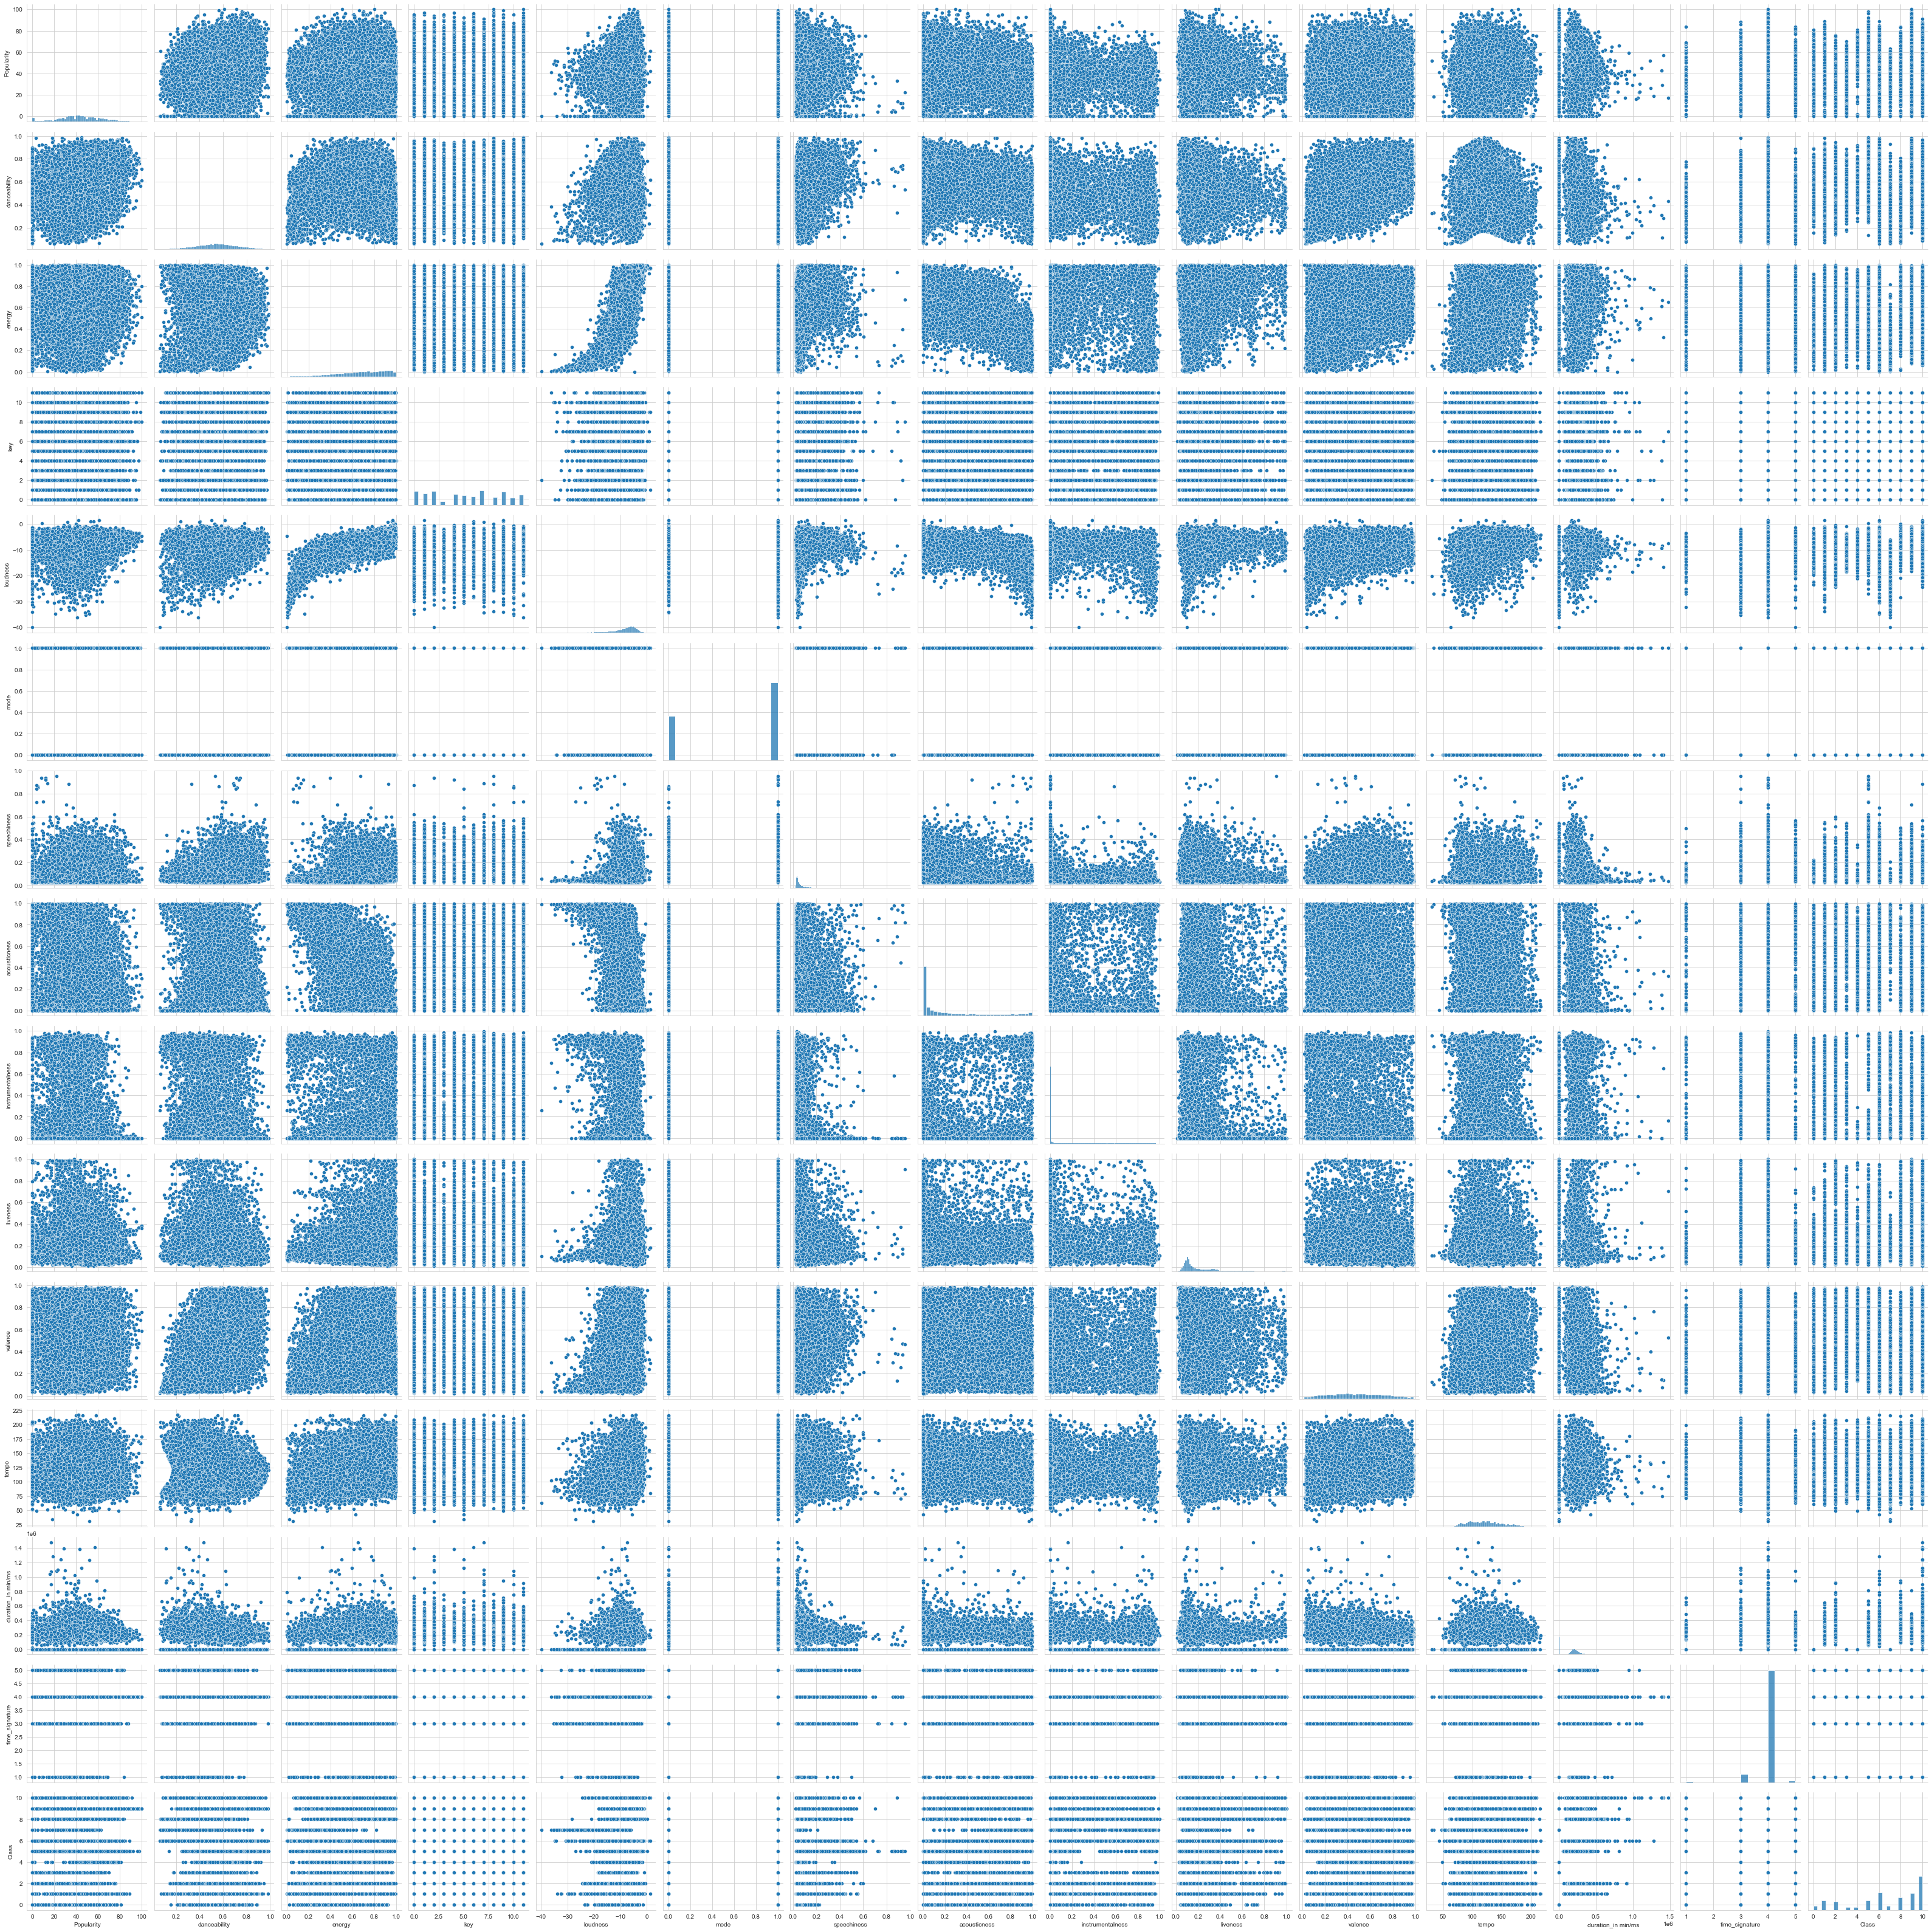

In [11]:
#Exploratory Data Analysis(EDA)

plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, height=3);
plt.show()

As we can see there is not much correlation between features. Although there is a bit correlation between <b>loudness</b> and <b>energy</b> feature, it will not affect so much the classification result.  

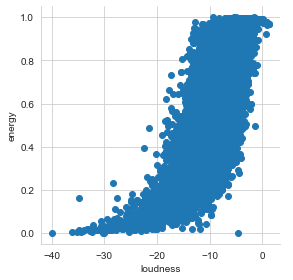

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(df, height=4) \
.map(plt.scatter, "loudness", "energy") \
.add_legend();
plt.show()

We will apply normalisation because, it is basically bringing all the values of different features on a same scale. As different features has different scale, normalising helps us and the model to optimise it’s parameters more efficiently.

In [13]:
x_data = df.drop(["Artist Name","Track Name","Class"],axis=1)
y_data = df["Class"]
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['Popularity', 'danceability', 'energy', 'key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature'])
df.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0          0.000000    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3          0.000000    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [14]:
df.drop(["Artist Name","Track Name","Class"], inplace=True,axis=1)

In [15]:
df.head()

Popularity  danceability  energy   key  loudness  mode  speechiness  \
0        60.0         0.854   0.564   1.0    -4.964     1       0.0485   
1        54.0         0.382   0.814   3.0    -7.230     1       0.0406   
2        35.0         0.434   0.614   6.0    -8.334     1       0.0525   
3        66.0         0.853   0.597  10.0    -6.528     0       0.0555   
4        53.0         0.167   0.975   2.0    -4.279     1       0.2160   

   acousticness  instrumentalness  liveness  valence    tempo  \
0      0.017100          0.000000    0.0849   0.8990  134.071   
1      0.001100          0.004010    0.1010   0.5690  116.454   
2      0.486000          0.000196    0.3940   0.7870  147.681   
3      0.021200          0.000000    0.1220   0.5690  107.033   
4      0.000169          0.016100    0.1720   0.0918  199.060   

   duration_in min/ms  time_signature  
0            234596.0               4  
1            251733.0               4  
2            109667.0               4  
3            173968.0               4  
4            229960.0               4

### As we can see our dataset is ready to process.

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

## <u>Section 1 : KNN</u>

<b>1.1) Applying KNN With Finding Best K</b>

Average accuracy in  10 - fold cross-validation for KNN with K= 1  is  0.3253501327898215
Average accuracy in  10 - fold cross-validation for KNN with K= 3  is  0.33107411524921254
Average accuracy in  10 - fold cross-validation for KNN with K= 5  is  0.38653017108270027
Average accuracy in  10 - fold cross-validation for KNN with K= 7  is  0.4024776418998209
Average accuracy in  10 - fold cross-validation for KNN with K= 9  is  0.41825792106725956
Average accuracy in  10 - fold cross-validation for KNN with K= 11  is  0.4323722438391699
Average accuracy in  10 - fold cross-validation for KNN with K= 13  is  0.4341502069050707
Average accuracy in  10 - fold cross-validation for KNN with K= 15  is  0.43754048545488233
Average accuracy in  10 - fold cross-validation for KNN with K= 17  is  0.4425423074547588
Average accuracy in  10 - fold cross-validation for KNN with K= 19  is  0.44643141251312457
Average accuracy in  10 - fold cross-validation for KNN with K= 21  is  0.4468207646223210

Text(0.5, 1.0, 'K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')

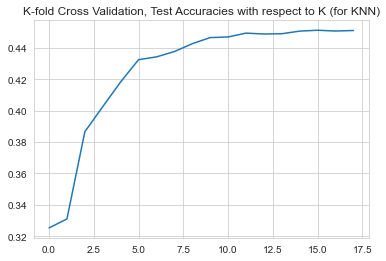

In [16]:
scores = [];

kfold = 10
bestScore = 0;
bestK = 0;
for k in range(1, 37, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knnScores = cross_val_score(knn, data, y_data, cv=kfold, scoring="accuracy")
    knnScore = statistics.mean(knnScores);
    scores.append(knnScore);
    
    print('Average accuracy in ', kfold, '- fold cross-validation for KNN with K=', k, ' is ', knnScore)
    if (knnScore > bestScore):
        bestScore = knnScore;
        bestK = k

print('')
print('Best K is ', bestK, ' with best score as ', bestScore)

plt.plot(scores)
plt.title('K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')

In [17]:
# performance for best K
knn = KNeighborsClassifier(n_neighbors=bestK)

X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.20, random_state=123)

knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
print("Training accuracy = ", sum(y_train_pred == y_train) / len(y_train_pred))

y_test_pred = knn.predict(X_test)
print("Test accuracy = ", sum(y_test_pred == y_test) / len(y_test_pred))

# confusion_matrix(y_test, y_test_pred)

Training accuracy =  0.48548207835509866
Test accuracy =  0.45444444444444443


<b>1.2) Applying KNN After LASSO, With Finding Best K</b>

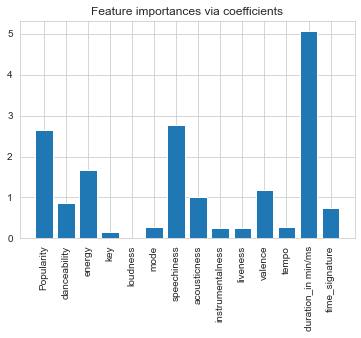

In [18]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(data, y_data)
importance = np.abs(lasso.coef_)
feature_names = np.array(df.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation='vertical')
plt.show()

As we can see ["key","loudness","mode","instrumentalness","liveness","tempo"] features are don't have much impact on result. So, we remove them to improve compilation efficiency.

In [19]:
x_data1 = df.drop(["key","loudness","mode","instrumentalness","liveness","tempo"],axis=1)
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data1)
data1 = pd.DataFrame(X_data_minmax,columns=['Popularity','danceability','energy','speechiness','acousticness','valence','duration_in min/ms','time_signature'])

Average accuracy in  10 - fold cross-validation for KNN with K= 1  is  0.33601886850719537
Average accuracy in  10 - fold cross-validation for KNN with K= 3  is  0.35013140016058303
Average accuracy in  10 - fold cross-validation for KNN with K= 5  is  0.3996413130751652
Average accuracy in  10 - fold cross-validation for KNN with K= 7  is  0.4204247112593416
Average accuracy in  10 - fold cross-validation for KNN with K= 9  is  0.43448431227225004
Average accuracy in  10 - fold cross-validation for KNN with K= 11  is  0.4377619974059663
Average accuracy in  10 - fold cross-validation for KNN with K= 13  is  0.4449860107467111
Average accuracy in  10 - fold cross-validation for KNN with K= 15  is  0.4482094373417331
Average accuracy in  10 - fold cross-validation for KNN with K= 17  is  0.45265412883700823
Average accuracy in  10 - fold cross-validation for KNN with K= 19  is  0.4542101167315175
Average accuracy in  10 - fold cross-validation for KNN with K= 21  is  0.4536545920573158


Text(0.5, 1.0, 'K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')

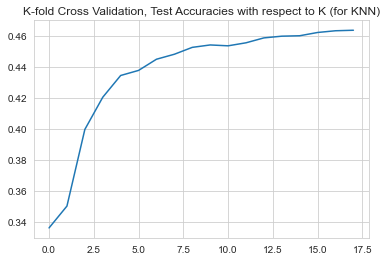

In [20]:
scores = [];

kfold = 10
bestScore = 0;
bestK = 0;
for k in range(1, 37, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knnScores = cross_val_score(knn, data1, y_data, cv=kfold, scoring="accuracy")
    knnScore = statistics.mean(knnScores);
    scores.append(knnScore);
    
    print('Average accuracy in ', kfold, '- fold cross-validation for KNN with K=', k, ' is ', knnScore)
    if (knnScore > bestScore):
        bestScore = knnScore;
        bestK = k

print('')
print('Best K is ', bestK, ' with best score as ', bestScore)

plt.plot(scores)
plt.title('K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')

In [21]:
# performance for best K
knn = KNeighborsClassifier(n_neighbors=bestK)

X_train, X_test, y_train, y_test = train_test_split(data1, y_data, test_size=0.20, random_state=123)

knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
print("Training accuracy = ", sum(y_train_pred == y_train) / len(y_train_pred))

y_test_pred = knn.predict(X_test)
print("Test accuracy = ", sum(y_test_pred == y_test) / len(y_test_pred))

Training accuracy =  0.4940955821061406
Test accuracy =  0.46805555555555556


<b>1.3) Built-in KNN</b>

We will use the built-in KNN algorithm from sci-kit learn. We split the our input and output data into training and testing data, as to train the model on training data and testing model’s accuracy on the testing model. We choose a 80%–20% split for our training and testing data.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_train_pred = knn_clf.predict(X_train) #These are the predicted output values
y_test_pred = knn_clf.predict(X_test) #These are the predicted output values

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 60   5   8   7   5   1  10   1   1  26  12]
 [  5  26  14   0   0   9  67   5  10  27  91]
 [  6  19  88   4   0   2  36   4   6  42  70]
 [  5   6  14  36   2   1   2   4   0   5   7]
 [ 18   5   5   0  18   1   4   0   1   8  21]
 [  1  11  11   0   1 162  17   0   5  62  27]
 [ 10  79  17   3   1  23 112   9  31  48 140]
 [  8   1   1   2   0   0   7 100   0   1   2]
 [  0  26   7   0   0   0  36   1 176   4 129]
 [ 17  41  32   1   6  54  59   0   4 186 106]
 [ 14 112  34   1   8   8 142   0 131  93 450]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.44      0.43       136
           1       0.08      0.10      0.09       254
           2       0.38      0.32      0.35       277
           3       0.67      0.44      0.53        82
           4       0.44      0.22      0.30        81
           5       0.62      0.55      0.58       297
           6       0.23      0.24      0.23       473
        

In [24]:
print("Training accuracy = ", sum(y_train_pred == y_train) / len(y_train_pred))

print("Test accuracy = ", sum(y_test_pred == y_test) / len(y_test_pred))

Training accuracy =  0.5839816615726591
Test accuracy =  0.3927777777777778


<b>1.4) Applying Built-in KNN After Feature Selection (LASSO) Process</b>

We have already applied LASSO. So, we know which features we will remove. We know ["key","loudness","mode","instrumentalness","liveness","tempo"] features are don't have much impact on result.

In [29]:
x_data2 = df.drop(["key","loudness","mode","instrumentalness","liveness","tempo"],axis=1)
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data2)
data2 = pd.DataFrame(X_data_minmax,columns=['Popularity','danceability','energy','speechiness','acousticness','valence','duration_in min/ms','time_signature'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data2, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_train_pred = knn_clf.predict(X_train) #These are the predicted output values
y_test_pred = knn_clf.predict(X_test) #These are the predicted output values

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 76   1   3  12   8   2   1  11   1  18   3]
 [  0  24  18   0   0  18  64   1  18  34  77]
 [  3  21  94   3   0   4  40   1   5  35  71]
 [  9   0   7  47   2   1   1   4   0   6   5]
 [ 17   3   0   7  38   2   0   0   0   4  10]
 [  2  12  14   0   0 187  20   0   4  43  15]
 [  3  69  30   2   0  36 108   5  19  61 140]
 [ 13   1   1   3   4   0   1  97   0   0   2]
 [  0  16   4   0   0   0  33   0 196   6 124]
 [ 11  44  38   3   8  41  69   4   5 171 112]
 [  5  99  48   0  14  19 160   0 136 105 407]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       136
           1       0.08      0.09      0.09       254
           2       0.37      0.34      0.35       277
           3       0.61      0.57      0.59        82
           4       0.51      0.47      0.49        81
           5       0.60      0.63      0.62       297
           6       0.22      0.23      0.22       473
        

In [32]:
print("Training accuracy = ", sum(y_train_pred == y_train) / len(y_train_pred))


print("Test accuracy = ", sum(y_test_pred == y_test) / len(y_test_pred))

Training accuracy =  0.5888441233676021
Test accuracy =  0.4013888888888889


<u><b>Training Accuracy</b> Results For All KNN Approaches</u>
    
    1.1) Applying KNN With Finding Best K = 0.48548207835509866
    1.2) Applying KNN After LASSO, With Finding Best K = 0.4940955821061406
    1.3) Built-in KNN = 0.5839816615726591
    1.4) Applying Built-in KNN After Feature Selection (LASSO) Process = 0.5888441233676021

<u><b>Test Accuracy</b> Results For All KNN Approaches</u>
    
    1.1) Applying KNN With Finding Best K = 0.45444444444444443
    1.2) Applying KNN After LASSO, With Finding Best K = 0.46805555555555556
    1.3) Built-in KNN = 0.4013888888888889 = 0.3927777777777778
    1.4) Applying Built-in KNN After Feature Selection (LASSO) Process = 0.4013888888888889

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

## <u>Section 2 : Logistic Regression</u>

Train a Logistic Regression model

In [48]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, max_iter=700)
softmax_reg.fit(data, y_data)



LogisticRegression(C=10, max_iter=700, multi_class='multinomial')

In [50]:
print('Overall accuracy (trained all data): ', softmax_reg.score(data, y_data))

Overall accuracy (trained all data):  0.4966103578573016


In [ ]:
df2 = pd.read_csv("submission.csv")

In [ ]:
list(df2.keys())

In [ ]:
df2.info()

In [ ]:
df2

In [ ]:
df2.iloc[5,:]

In [ ]:
df3 = pd.read_csv("test.csv")

In [ ]:
list(df3.keys())

In [ ]:
df3.info()

In [ ]:
df3.head()